In [1]:
#import scipy
import csv

center = []
left = []
right = []
steering = []
steering_left = []
steering_right = []
throttle = []
brake = []
speed = []

#read drivinglog.csv
with open('data/driving_log.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        center.append(row['center'])
        left.append(row['left'][1:])
        right.append(row['right'][1:])
        steering.append(float(row['steering']))
        #steering_left.append(float(row['steering'])+0.25)
        #steering_right.append(float(row['steering'])-0.25)
        throttle.append(float(row['throttle']))
        brake.append(float(row['brake']))
        speed.append(float(row['speed']))

#print (center[:10])
#print (left[:10])
#print (right[:10])
print (steering_left[50:100])
print (steering[50:100])
print (steering_right[50:100])
#print (throttle[:100])
#print (brake[:100])
print (len(center))

[]
[0.0, 0.0617599, 0.05219137, 0.05219137, 0.3679529, 0.5784606, 0.5784606, 0.1670138, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08089697, 0.0904655, 0.0904655, 0.1574452, 0.1765823, 0.1765823, 0.0, 0.0, 0.0, -0.0787459, -0.0787459, -0.0787459, -0.0787459, 0.0, 0.0, 0.0, 0.0, 0.05219137, 0.05219137, 0.0904655, 0.38709, 0.3583844, 0.05219137, 0.0, 0.0, 0.0, 0.0, 0.0, -0.03127411, -0.05975719, -0.05975719]
[]
8036


In [2]:
import numpy as np
from subprocess import call
from numpy import arange 

smooth = []
smooth_l = []
smooth_r = []
moving_range = 60
moving_avg = arange(-1,1,2/moving_range) 
print (len(moving_avg))

for i in range(len(steering)):
    j = i%moving_range
    moving_avg[j] = steering[i]
    smooth.append(np.mean(moving_avg)*2)
    smooth_l.append(np.mean(moving_avg)*2+0.1)
    smooth_r.append(np.mean(moving_avg)*2-0.1)
    

60


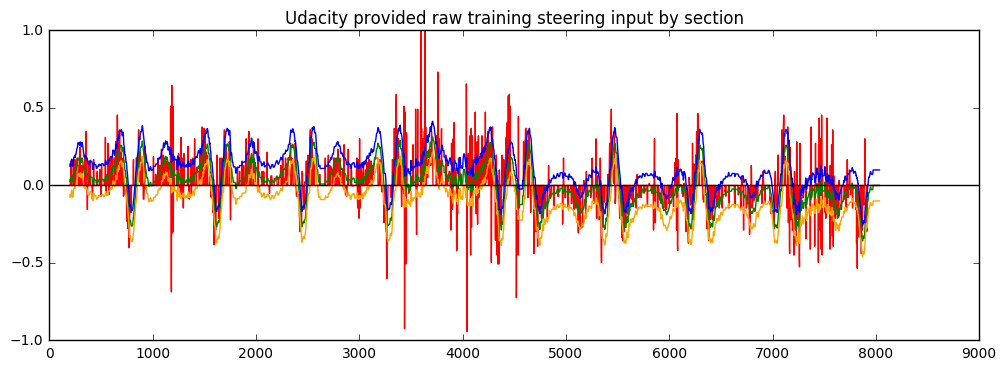

In [3]:
#Plot the steering angle for each frame, show the section form 500 to 1000.
#Overall, the steering range from -1 to 1. 
#Somehow, the steering input is not smooth, I will further investagate into it. 
#

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as collections


t = np.arange(0.0, len(center), 1)[200:]

fig, ax = plt.subplots(figsize =(12,4))
ax.set_title('Udacity provided raw training steering input by section')
ax.plot(t, steering[200:], color='red')
ax.plot(t, smooth[200:], color='green')
ax.plot(t, smooth_l[200:], color='blue')
ax.plot(t, smooth_r[200:], color='orange')
ax.axhline(0, color='black', lw=1)


plt.show()

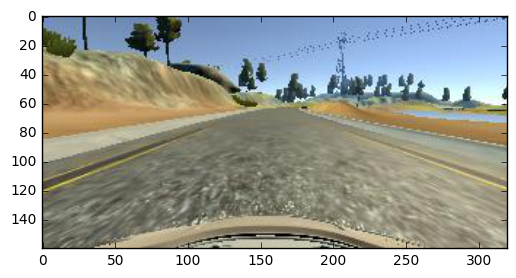

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

#reading in an image
index = np.random.randint(1,len(center))
image1 = mpimg.imread('data/'+center[index])
#printing out some stats and plotting
#print('This image is:', type(image), 'with dimesions:', image.shape)
#plt.imshow(image1) 
plt.imshow(image1) 

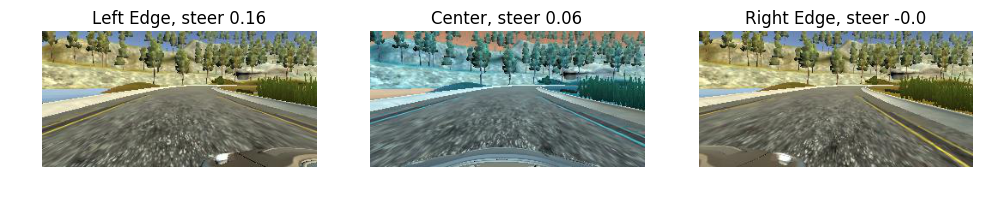

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import scipy.misc
%matplotlib inline

#reading in Left, Center and Right image

index = np.random.randint(1,len(center))
img_left = mpimg.imread('data/'+left[index])
img_center = cv2.imread('data/'+center[index])
img_right = scipy.misc.imread('data/'+right[index])

fig, ax = plt.subplots(figsize=(12,2))
plt.subplot(131),plt.imshow(img_left),plt.title('Left Edge, steer '+str(smooth_l[index])[:4]),plt.axis('off')
plt.subplot(132),plt.imshow(img_center),plt.title('Center, steer '+str(smooth[index])[:4]),plt.axis('off')
plt.subplot(133),plt.imshow(img_right),plt.title('Right Edge, steer '+str(smooth_r[index])[:4]),plt.axis('off')
plt.show()

In [6]:
print('Merge Left, Center and Right Camera image together...')

X_all = np.concatenate((center, left, right), axis = 0)
y_all = np.concatenate((smooth, smooth_l, smooth_r), axis = 0)

print('Merge completed. Number of total samples', len(y_all))

Merge Left, Center and Right Camera image together...
Merge completed. Number of total samples 24108


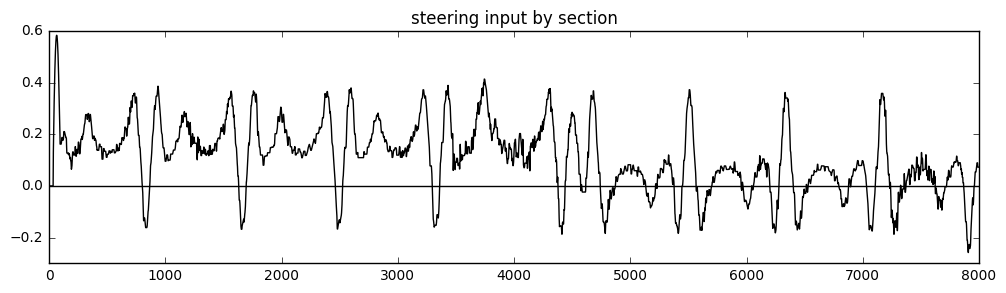

In [7]:
#Plot the steering angle for each frame, show the section form 500 to 1000.
#Overall, the steering range from -1 to 1. 
#Somehow, the steering input is not smooth, I will further investagate into it. 
#

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as collections


f = np.arange(0.0, len(y_all[8000:16000]), 1)

fig, ax = plt.subplots(figsize =(12,3))
ax.set_title('steering input by section')
ax.plot(f, y_all[8000:16000], color='black')
ax.axhline(0, color='black', lw=1)


plt.show()

In [8]:
def flip_image(img, angle):
    img_flip = cv2.flip(img,1)
    angle = -angle
    return img_flip, angle

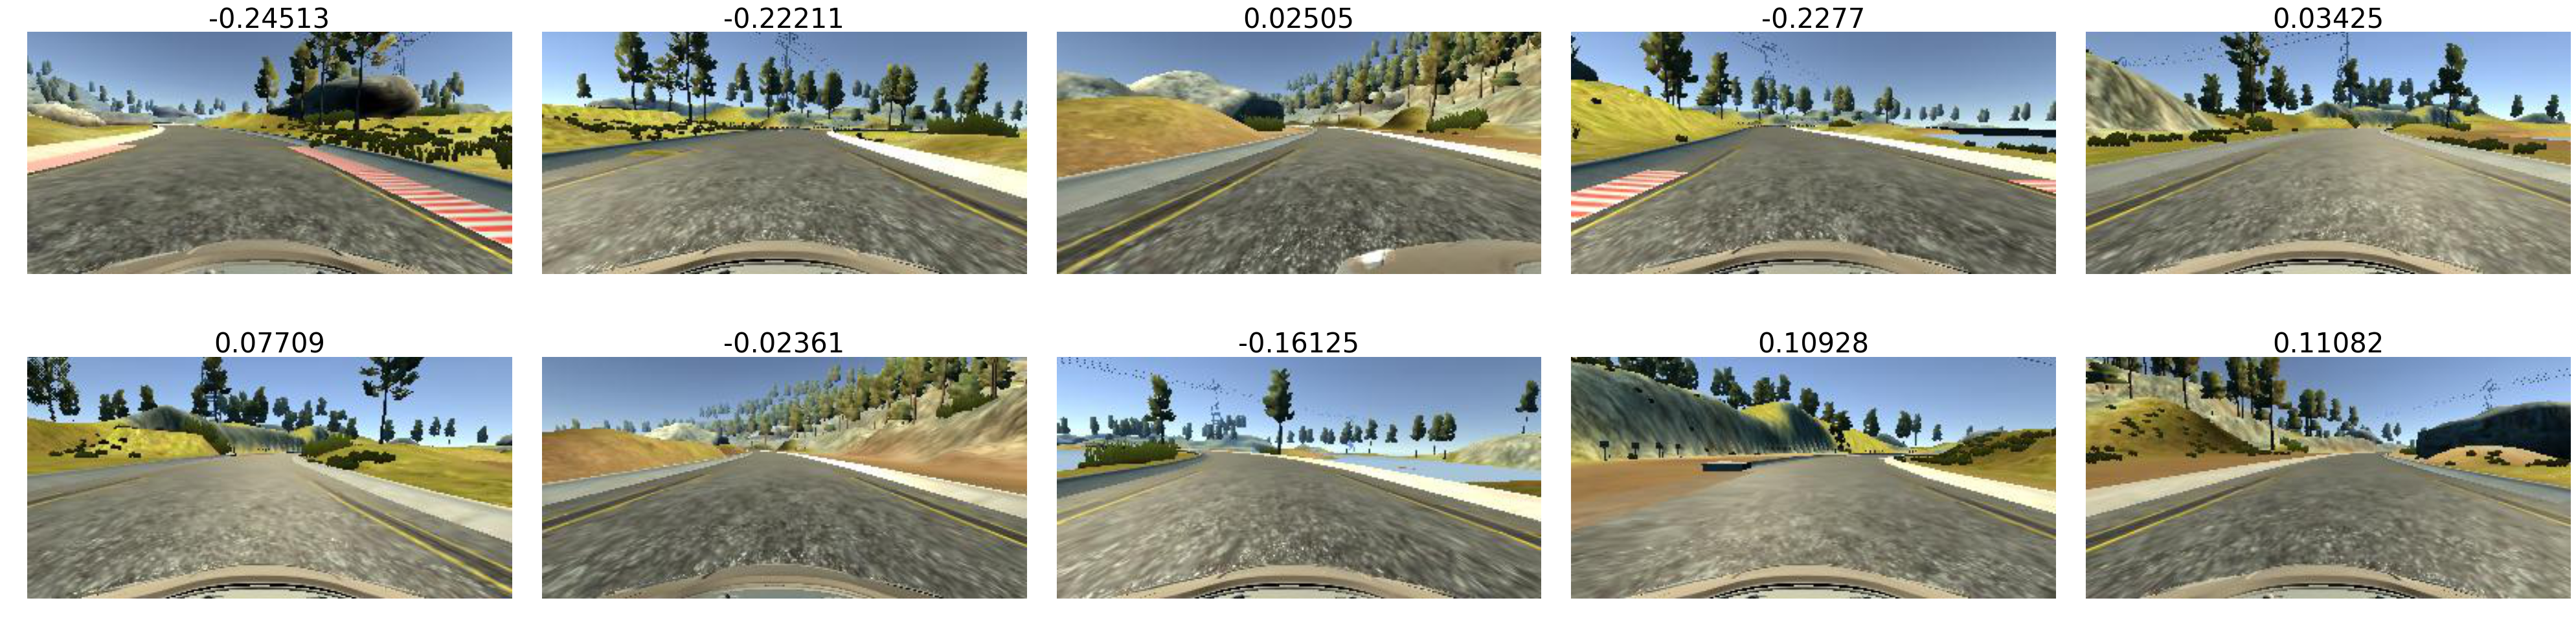

In [9]:
plt.rcParams['figure.figsize']=[40,20]
for i in range(0,10):
    plt.subplot(4,5,i+1)
    plt.tight_layout()
    plt.axis('off')
    index = np.random.randint(1,len(X_all))
    plt.title(str(np.round(y_all[index],5)),fontsize=30)
    plt.imshow(mpimg.imread('data/'+X_all[index]))
        

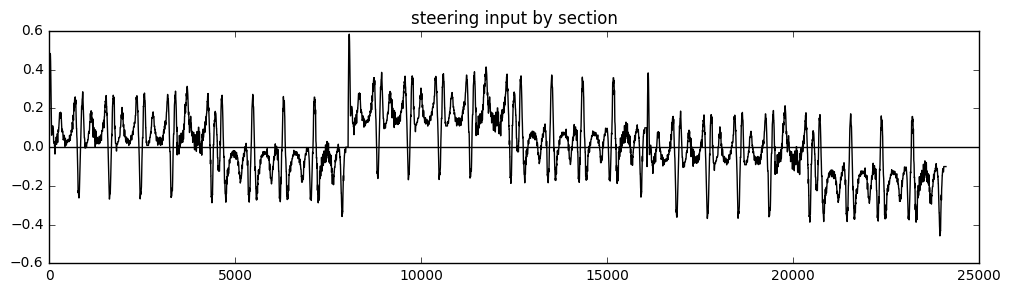

In [10]:
#Plot the steering angle for each frame, show the section form 500 to 1000.
#Overall, the steering range from -1 to 1. 
#Somehow, the steering input is not smooth, I will further investagate into it. 
#

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as collections


f = np.arange(0.0, len(y_all), 1)

fig, ax = plt.subplots(figsize =(12,3))
ax.set_title('steering input by section')
ax.plot(f, y_all, color='black')
ax.axhline(0, color='black', lw=1)


plt.show()

In [11]:
### Helper function - Random Plot images with adjusted brightness in the dataset 
### Credit to vivek yadav on his post.

import matplotlib.gridspec as gridspec

def darkness(image):

    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    #random_bright = .15+np.random.uniform()
    random_bright = np.random.uniform(0.1,1.2)
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def plot_random_brightness(n_row,n_col,X):

    plt.figure(figsize = (2.5*n_col,1.2*n_row))
    gs1 = gridspec.GridSpec(n_row,n_col)
    gs1.update(wspace=0.3, hspace=0.3) # set the spacing between axes. 

    for i in range(n_row*n_col):
        ax1 = plt.subplot(gs1[i])
        index = np.random.randint(1,len(y_all))
        img = mpimg.imread('data/'+X_all[index])
        plt.imshow(darkness(img))
        plt.axis('off')
        #plt.text(2,4,str(sign_name[y[index]]),color='k',backgroundcolor='y')
        
    plt.show()

ploting images in train dataset with random brightness......


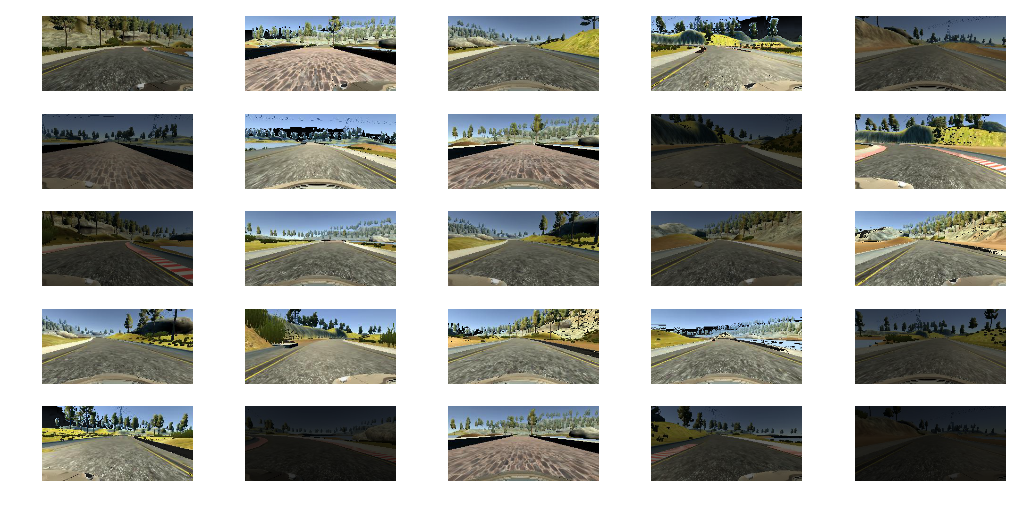

In [12]:
print('ploting images in train dataset with random brightness......')
plot_random_brightness(5,5,image1)

ploting images in driving dataset with random Horizontal and Vertical shift......


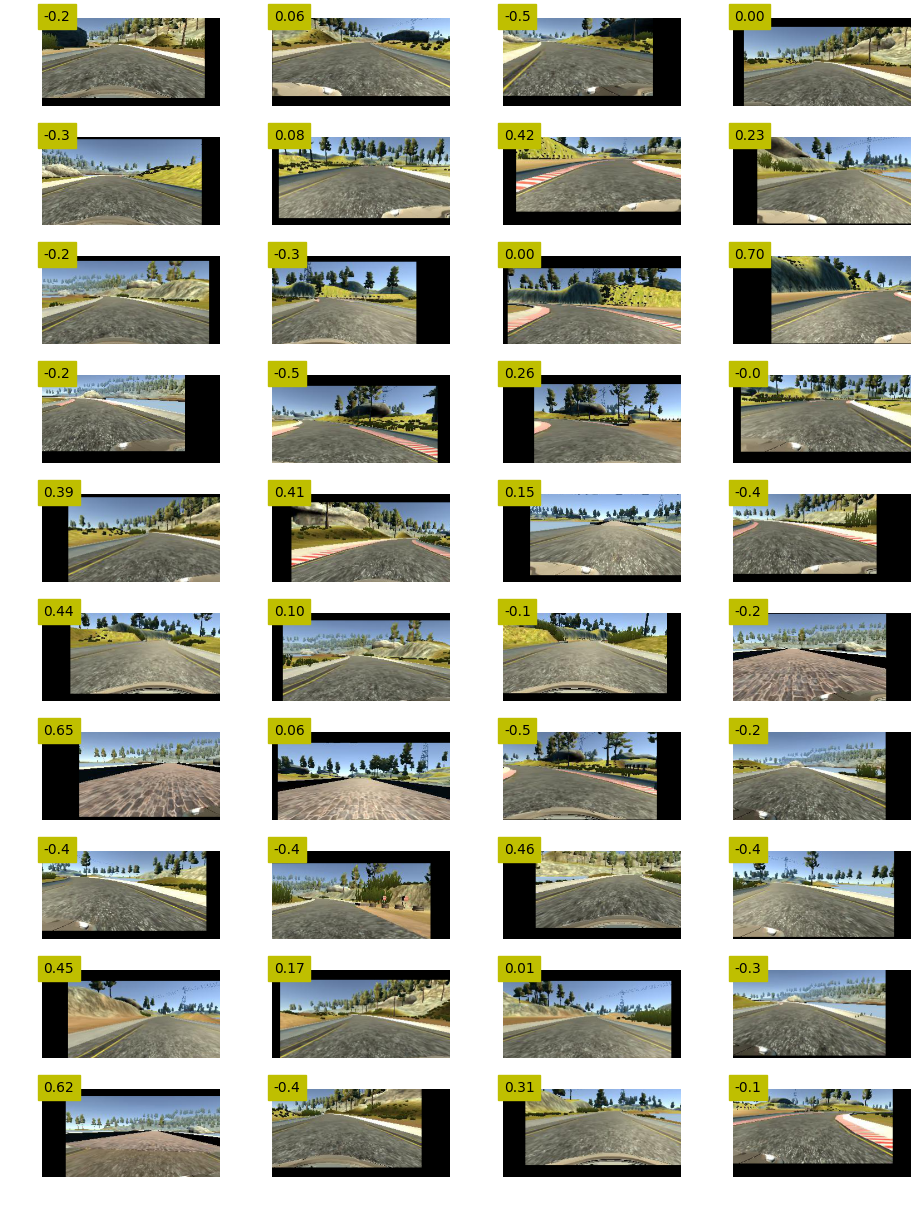

In [13]:
### Helper function - Random Plot images with steering angle label in the dataset 
### Credit to vivek yadav on his post, and opencv documents.
print('ploting images in driving dataset with random Horizontal and Vertical shift......')

import matplotlib.gridspec as gridspec

def trans_image(image,steer,trans_range):
    # Translation
    tr_x = np.random.uniform()-0.5
    steer_ang = steer + tr_x/trans_range
    tr_y = np.random.uniform()-0.5
    rows,cols,ch = image.shape
    Trans_M = np.float32([[1,0,tr_x*140],[0,1,tr_y*50]])
    image_tr = cv2.warpAffine(image,Trans_M,(cols,rows))
    return image_tr,steer_ang


def plot_random_shift(n_row,n_col,shift_range):

    plt.figure(figsize = (2.8*n_col,1.5*n_row))
    gs1 = gridspec.GridSpec(n_row,n_col)
    gs1.update(wspace=0.3, hspace=0.3) # set the spacing between axes. 

    for i in range(n_row*n_col):
        ax1 = plt.subplot(gs1[i])
        index = np.random.randint(1,len(y_all))
        #img = cv2.imread('data/'+X_all[index])
        img = mpimg.imread('data/'+X_all[index])
        dst = trans_image(img,y_all[index],shift_range)
        plt.imshow(dst[0])
        plt.text(2,4,str(dst[1])[:4],color='k',backgroundcolor='y')
        plt.axis('off')        
    plt.show()

# plot 10 rows, 4 cols with shift range 1:   
plot_random_shift(10,4,1)

In [14]:
def add_random_shadow(image):
    image = mpimg.imread('data/'+X_all[index])
    rows,cols,ch = image.shape
    top_y = 160*np.random.uniform(-cols,cols)
    top_x = 320*np.random.uniform()
    bot_x = 320*np.random.uniform()
    bot_y = 160*np.random.uniform()
    image_hls = cv2.cvtColor(image,cv2.COLOR_RGB2HLS)
    shadow_mask = 0*image_hls[:,:,1]
    X_m = np.mgrid[0:image.shape[0],0:image.shape[1]][0]
    Y_m = np.mgrid[0:image.shape[0],0:image.shape[1]][1]
    shadow_mask[((X_m-top_x)*(bot_y-top_y) -(bot_x - top_x)*(Y_m-top_y) >=0)]=1
    random_bright = .1+.7*np.random.uniform()
    if np.random.randint(2)==1:
        #random_bright = .5
        cond1 = shadow_mask==1
        cond0 = shadow_mask==0
        if np.random.randint(2)==1:
            image_hls[:,:,1][cond1] = image_hls[:,:,1][cond1]*random_bright
        else:
            image_hls[:,:,1][cond0] = image_hls[:,:,1][cond0]*random_bright    
    image = cv2.cvtColor(image_hls,cv2.COLOR_HLS2RGB)

    return image

In [15]:
def mask(img):
    """
    Applies an image mask.
    region_of_interest(img, vertices):
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    #mask = np.zeros_like(img)
    #image1 = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    image = mpimg.imread('data/'+X_all[index])
    rows,cols,ch = image.shape
    ax = cols*(np.random.uniform()-0.5)+y_all[index]*200
    bx = ax+cols*np.random.uniform()
    cx = cols*(np.random.uniform()-0.5)*2+cols*(np.random.uniform()-0.5)
    dx = cx+cols*np.random.uniform()
    p = (np.random.uniform(-0.5,0.5))
    #vertices = np.array([[(p*cols,rows),(ax,int(p*rows)), (bx, int(p*rows)), (cols*(1+p),rows)]], dtype=np.int32)
    vertices = np.array([[(dx,rows),(ax,int(p*rows)), (bx, int(p*rows)), (cx,rows)]], dtype=np.int32)
       
    shadow = np.random.randint(1, 255)
    mask = np.full_like(img, shadow)
    #image1[:,:,2] = image1[:,:,2]*shadow*.5
    #image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    
    return masked_image

In [24]:
def random_crop(img, angle):
    center_row = 80
    center_col = 160
    width = 200
    height = 66
    
    x_var = int(np.random.uniform(-20,20))
    y_var = int(np.random.uniform(-10,10))
    
    crop_img = img[(center_row-height/2+y_var):(center_row+height/2+y_var),
                  (center_col-width/2+x_var):(center_col+width/2+x_var)]
    
    angle_factor = 0.002 # degree per each shifted pixel
    adj_angle = angle + angle_factor*y_var
    
    return crop_img, adj_angle
    

/home/tfbox/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


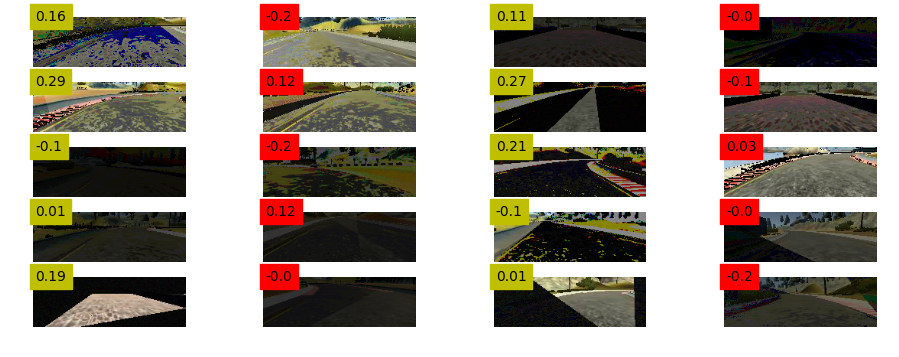

In [27]:
### Helper function - Random Plot images with label in the dataset 
### Credit to vivek yadav on his post, and http://www.hvass-labs.org/.

import matplotlib.gridspec as gridspec

def plot_random_shadow(n_row,n_col):

    plt.figure(figsize = (2.8*n_col,0.8*n_row))
    gs1 = gridspec.GridSpec(n_row,n_col)
    gs1.update(wspace=0.3, hspace=0.3) # set the spacing between axes. 

    for i in range(n_row*n_col):
        ax1 = plt.subplot(gs1[i])
        index = np.random.randint(1,len(y_all))
        image = mpimg.imread('data/'+X_all[index])
        rows,cols,ch = image.shape
        #ax = cols*(np.random.uniform()-0.5)+y_all[index]*200
        #bx = ax+cols*np.random.uniform()
        #cx = cols*(np.random.uniform()-0.5)*2+cols*(np.random.uniform()-0.5)
        #dx = cx+cols*np.random.uniform()
        q = (np.random.uniform(-0.5,0.5))
        #vertices = np.array([[(p*cols,rows),(ax,int(p*rows)), (bx, int(p*rows)), (cols*(1+p),rows)]], dtype=np.int32)
        #vertices = np.array([[(dx,rows),(ax,int(p*rows)), (bx, int(p*rows)), (cx,rows)]], dtype=np.int32)
        dark_img = darkness(image)
        #trans_range = q
        #tr_img,steer_angle = trans_image(dark_img,y_all[index],trans_range)
        
        masked_img = mask(dark_img)
        cropped_img,adj_angle = random_crop(masked_img,y_all[index])
        #shift_img = trans_image(image1,0.5,0.5)
        #shift_range = 1
        #dst = trans_image(img,y_all[index],shift_range)
        #plt.imshow(add_random_shadow(img))
        
        if i%2 ==1:
            plt.imshow(flip_image(cropped_img,adj_angle)[0])
            plt.text(2,4,str(-adj_angle)[:4],color='k',backgroundcolor='r')
            plt.axis('off')
        if i%2 ==0:
            plt.imshow(cropped_img)
            #plt.text(2,4,str(y_all[index])[:4],color='k',backgroundcolor='y')
            plt.text(2,4,str(adj_angle)[:4],color='k',backgroundcolor='y')
            plt.axis('off')
    plt.show()

plot_random_shadow(5,4)